<a href="https://colab.research.google.com/github/Rishi0115/Smart-Irrigation/blob/main/smart_irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
from datetime import datetime
# Set a random seed for consistency
random.seed(42)
# Define possible values for categorical data
crops = ["Wheat", "Sugarcane", "Corn"]
growth_stages = ["Seeding", "Vegetative", "Flowering", "Maturity"]
soil_types = ["Alluvial", "Black", "Red", "Laterite", "Desert", "Himalayan"]
climate_zones = ["Arid", "Semi-Arid", "Tropical Wet", "Temperate", "Himalayan"]
# Generate synthetic data
num_samples = 500  # Number of rows
data = []
for _ in range(num_samples):
    crop = random.choice(crops)
    stage = random.choice(growth_stages)
    soil = random.choice(soil_types)
    climate = random.choice(climate_zones)
    # Generate date-based features
    month = random.randint(1, 12)  # Month (1-12)
    week = random.randint(1, 52)  # Week (1-52)

    # Generate weather conditions
    temperature = round(random.uniform(-5, 45), 1)  # °C, considering Himalayan regions
    humidity = round(random.uniform(20, 95), 1)  # %
    rainfall = round(random.uniform(50, 4000), 1)  # mm
    wind_speed = round(random.uniform(1, 30), 1)  # km/h
    sunlight = round(random.uniform(3, 12), 1)  # hours/day

    # Generate ideal soil moisture percentage based on crop & growth stage
    if crop == "Wheat":
        base_moisture = 50 if stage == "Seeding" else 45 if stage == "Vegetative" else 60 if stage == "Flowering" else 40
    elif crop == "Sugarcane":
        base_moisture = 65 if stage == "Seeding" else 60 if stage == "Vegetative" else 75 if stage == "Flowering" else 55
    else:  # Corn
        base_moisture = 55 if stage == "Seeding" else 50 if stage == "Vegetative" else 65 if stage == "Flowering" else 45

    # Adjust moisture based on soil and climate
    if soil in ["Black", "Alluvial"]:
        base_moisture -= 5  # These soils retain more water
    elif soil in ["Desert"]:
        base_moisture += 10  # These soils require more water
    elif soil in ["Himalayan"]:
        base_moisture += 5  # High-altitude regions might need more water retention

    if climate in ["Arid", "Semi-Arid"]:
        base_moisture += 5  # Hotter climate means higher moisture needed
    elif climate in ["Himalayan"]:
        base_moisture -= 5  # Cold regions need less moisture

    ideal_moisture = min(max(base_moisture, 30), 85)  # Keep within realistic range

    data.append([crop, stage, soil, climate, month, week, temperature, humidity, rainfall, wind_speed, sunlight, ideal_moisture])


# Create a DataFrame
df = pd.DataFrame(data, columns=["Crop", "Growth Stage", "Soil Type", "Climate Zone", "Month", "Week", "Temperature", "Humidity", "Rainfall", "Wind Speed", "Sunlight", "Ideal Moisture (%)"])


# Save to CSV
df.to_csv("crop_data.csv", index=False)
print("Synthetic data saved to crop_data.csv")


# Load CSV
df_loaded = pd.read_csv("crop_data.csv")
print(df_loaded.head())  # Display first 5 rows




Synthetic data saved to crop_data.csv
        Crop Growth Stage Soil Type  Climate Zone  Month  Week  Temperature  \
0       Corn      Seeding  Alluvial  Tropical Wet      4    15          2.0   
1      Wheat      Seeding  Alluvial     Semi-Arid      4    33         25.1   
2  Sugarcane    Flowering  Alluvial     Semi-Arid     12    28         12.0   
3      Wheat    Flowering       Red     Himalayan      5    52         -2.8   
4  Sugarcane    Flowering    Desert     Semi-Arid     12     5         -2.7   

   Humidity  Rainfall  Wind Speed  Sunlight  Ideal Moisture (%)  
0      27.7    2975.6        16.8       8.3                  50  
1      62.1    2878.3        21.3       6.8                  50  
2      31.7    3831.0        10.8       3.8                  75  
3      54.5     543.1        27.7       3.7                  55  
4      37.1    1193.1         3.3       5.1                  85  


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file into a DataFrame
df = pd.read_csv("crop_data.csv")

# Display the first 5 rows
print(df.head())


        Crop Growth Stage Soil Type  Climate Zone  Month  Week  Temperature  \
0       Corn      Seeding  Alluvial  Tropical Wet      4    15          2.0   
1      Wheat      Seeding  Alluvial     Semi-Arid      4    33         25.1   
2  Sugarcane    Flowering  Alluvial     Semi-Arid     12    28         12.0   
3      Wheat    Flowering       Red     Himalayan      5    52         -2.8   
4  Sugarcane    Flowering    Desert     Semi-Arid     12     5         -2.7   

   Humidity  Rainfall  Wind Speed  Sunlight  Ideal Moisture (%)  
0      27.7    2975.6        16.8       8.3                  50  
1      62.1    2878.3        21.3       6.8                  50  
2      31.7    3831.0        10.8       3.8                  75  
3      54.5     543.1        27.7       3.7                  55  
4      37.1    1193.1         3.3       5.1                  85  


In [ ]:
df.describe()

,Month,Week,Temperature,Humidity,Rainfall,Wind Speed,Sunlight,Ideal Moisture (%)
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.510000,26.87000,19.321200,55.859600,2020.579000,15.935800,7.519200,57.160000
std,3.454529,15.09506,14.521837,21.516352,1178.159798,8.211821,2.586529,12.000935
min,1.000000,1.00000,-4.700000,20.000000,56.200000,1.000000,3.000000,30.000000
25%,4.000000,15.00000,6.675000,37.675000,998.075000,9.200000,5.300000,50.000000
50%,7.000000,27.00000,18.850000,55.050000,2003.650000,16.200000,7.500000,55.000000
75%,10.000000,40.00000,31.900000,74.300000,3087.650000,23.225000,9.700000,65.000000
max,12.000000,52.00000,44.800000,95.000000,3997.300000,29.900000,12.000000,85.000000


In [ ]:
df.shape

(500, 12)

In [5]:
col = list(df.columns)
print(col)

['Crop', 'Growth Stage', 'Soil Type', 'Climate Zone', 'Month', 'Week', 'Temperature', 'Humidity', 'Rainfall', 'Wind Speed', 'Sunlight', 'Ideal Moisture (%)']


In [6]:
df.head()

,Crop,Growth Stage,Soil Type,Climate Zone,Month,Week,Temperature,Humidity,Rainfall,Wind Speed,Sunlight,Ideal Moisture (%)
0,Corn,Seeding,Alluvial,Tropical Wet,4,15,2.0,27.7,2975.6,16.8,8.3,50
1,Wheat,Seeding,Alluvial,Semi-Arid,4,33,25.1,62.1,2878.3,21.3,6.8,50
2,Sugarcane,Flowering,Alluvial,Semi-Arid,12,28,12.0,31.7,3831.0,10.8,3.8,75
3,Wheat,Flowering,Red,Himalayan,5,52,-2.8,54.5,543.1,27.7,3.7,55
4,Sugarcane,Flowering,Desert,Semi-Arid,12,5,-2.7,37.1,1193.1,3.3,5.1,85


In [7]:
df.value_counts("Growth Stage")

,count
Growth Stage,
Maturity,133
Flowering,126
Seeding,121
Vegetative,120


In [8]:
df.value_counts("Crop")

,count
Crop,
Corn,180
Sugarcane,163
Wheat,157


In [9]:
df.value_counts("Soil Type")

,count
Soil Type,
Desert,96
Alluvial,91
Himalayan,84
Black,78
Red,77
Laterite,74


In [10]:
df.value_counts("Climate Zone")

,count
Climate Zone,
Himalayan,111
Temperate,107
Semi-Arid,96
Arid,95
Tropical Wet,91


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Crop                500 non-null    object 
 1   Growth Stage        500 non-null    object 
 2   Soil Type           500 non-null    object 
 3   Climate Zone        500 non-null    object 
 4   Month               500 non-null    int64  
 5   Week                500 non-null    int64  
 6   Temperature         500 non-null    float64
 7   Humidity            500 non-null    float64
 8   Rainfall            500 non-null    float64
 9   Wind Speed          500 non-null    float64
 10  Sunlight            500 non-null    float64
 11  Ideal Moisture (%)  500 non-null    int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 47.0+ KB


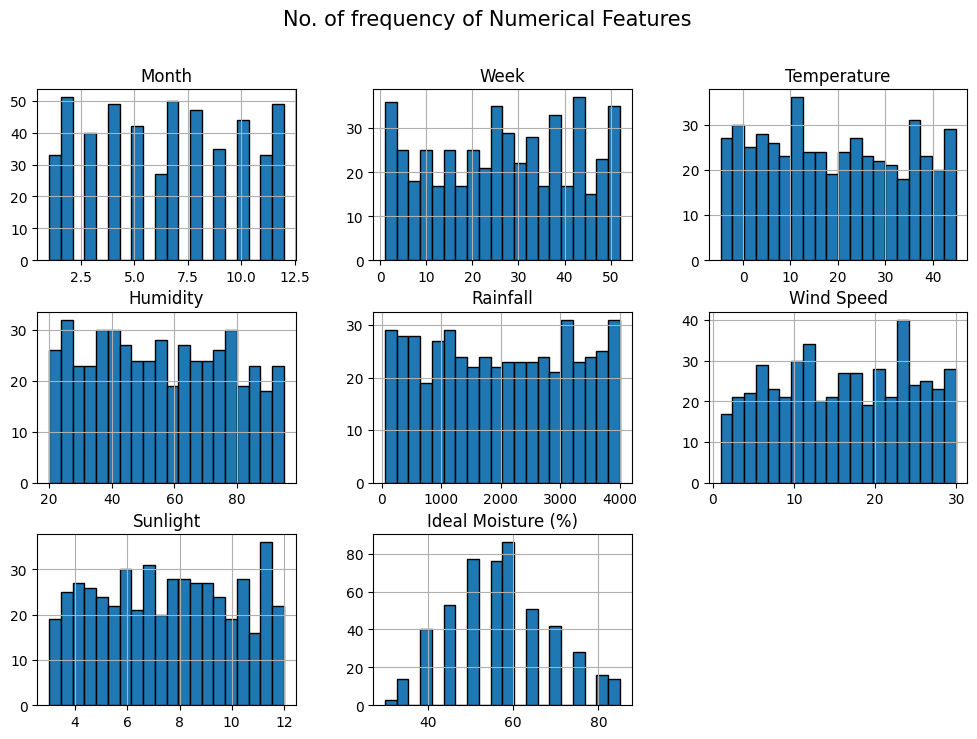

In [12]:
# Plot histograms for numerical columns
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("No. of frequency of Numerical Features", fontsize=15)
plt.show()

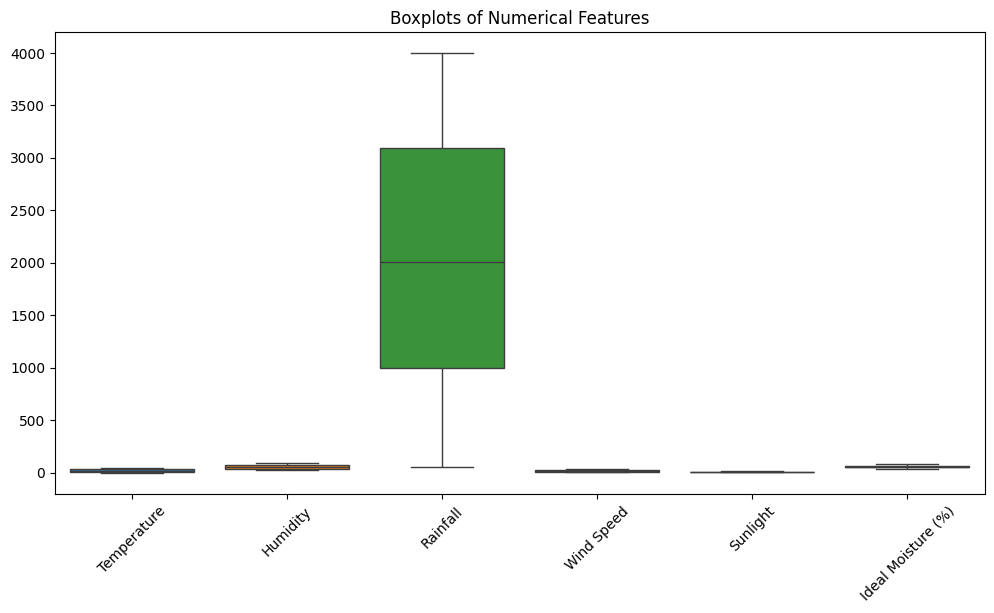

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["Temperature", "Humidity", "Rainfall", "Wind Speed", "Sunlight", "Ideal Moisture (%)"]])
plt.xticks(rotation=45) #plt.xticks() is a function used to control the labels and rotation of the ticks on the X-axis of your plot
plt.title("Boxplots of Numerical Features")
plt.show()


In [14]:
import numpy as np
df_log = df.copy()
df_log["Rainfall"] = np.log1p(df_log["Rainfall"])  # Log Transform only Rainfall
df_log.head()

,Crop,Growth Stage,Soil Type,Climate Zone,Month,Week,Temperature,Humidity,Rainfall,Wind Speed,Sunlight,Ideal Moisture (%)
0,Corn,Seeding,Alluvial,Tropical Wet,4,15,2.0,27.7,7.998537,16.8,8.3,50
1,Wheat,Seeding,Alluvial,Semi-Arid,4,33,25.1,62.1,7.965302,21.3,6.8,50
2,Sugarcane,Flowering,Alluvial,Semi-Arid,12,28,12.0,31.7,8.251142,10.8,3.8,75
3,Wheat,Flowering,Red,Himalayan,5,52,-2.8,54.5,6.299133,27.7,3.7,55
4,Sugarcane,Flowering,Desert,Semi-Arid,12,5,-2.7,37.1,7.085148,3.3,5.1,85


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()  # Create a copy to avoid modifying original data
# Apply scaling to all numerical columns
df_scaled[df_scaled.select_dtypes(include=['number']).columns] = scaler.fit_transform(
    df_scaled.select_dtypes(include=['number'])
)
df_scaled.head()  # Check if scaling worked


,Crop,Growth Stage,Soil Type,Climate Zone,Month,Week,Temperature,Humidity,Rainfall,Wind Speed,Sunlight,Ideal Moisture (%)
0,Corn,Seeding,Alluvial,Tropical Wet,0.272727,0.274510,0.135354,0.102667,0.740758,0.546713,0.588889,0.363636
1,Wheat,Seeding,Alluvial,Semi-Arid,0.272727,0.627451,0.602020,0.561333,0.716069,0.702422,0.422222,0.363636
2,Sugarcane,Flowering,Alluvial,Semi-Arid,1.000000,0.529412,0.337374,0.156000,0.957804,0.339100,0.088889,0.818182
3,Wheat,Flowering,Red,Himalayan,0.363636,1.000000,0.038384,0.460000,0.123544,0.923875,0.077778,0.454545
4,Sugarcane,Flowering,Desert,Semi-Arid,1.000000,0.078431,0.040404,0.228000,0.288473,0.079585,0.233333,1.000000


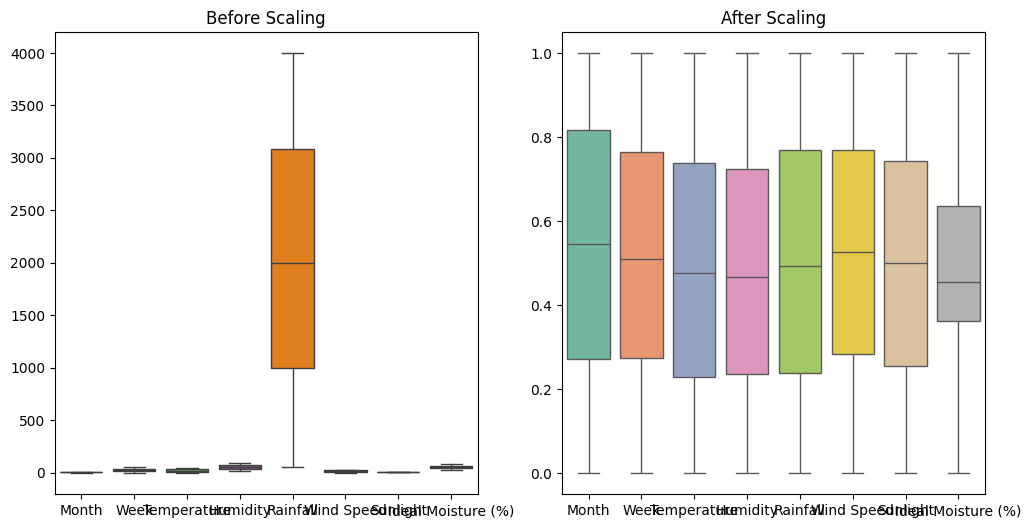

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, palette="Set1")
plt.title("Before Scaling")
plt.subplot(1, 2, 2)
sns.boxplot(data=df_scaled, palette="Set2")  # Now df_scaled is defined
plt.title("After Scaling")
plt.show()

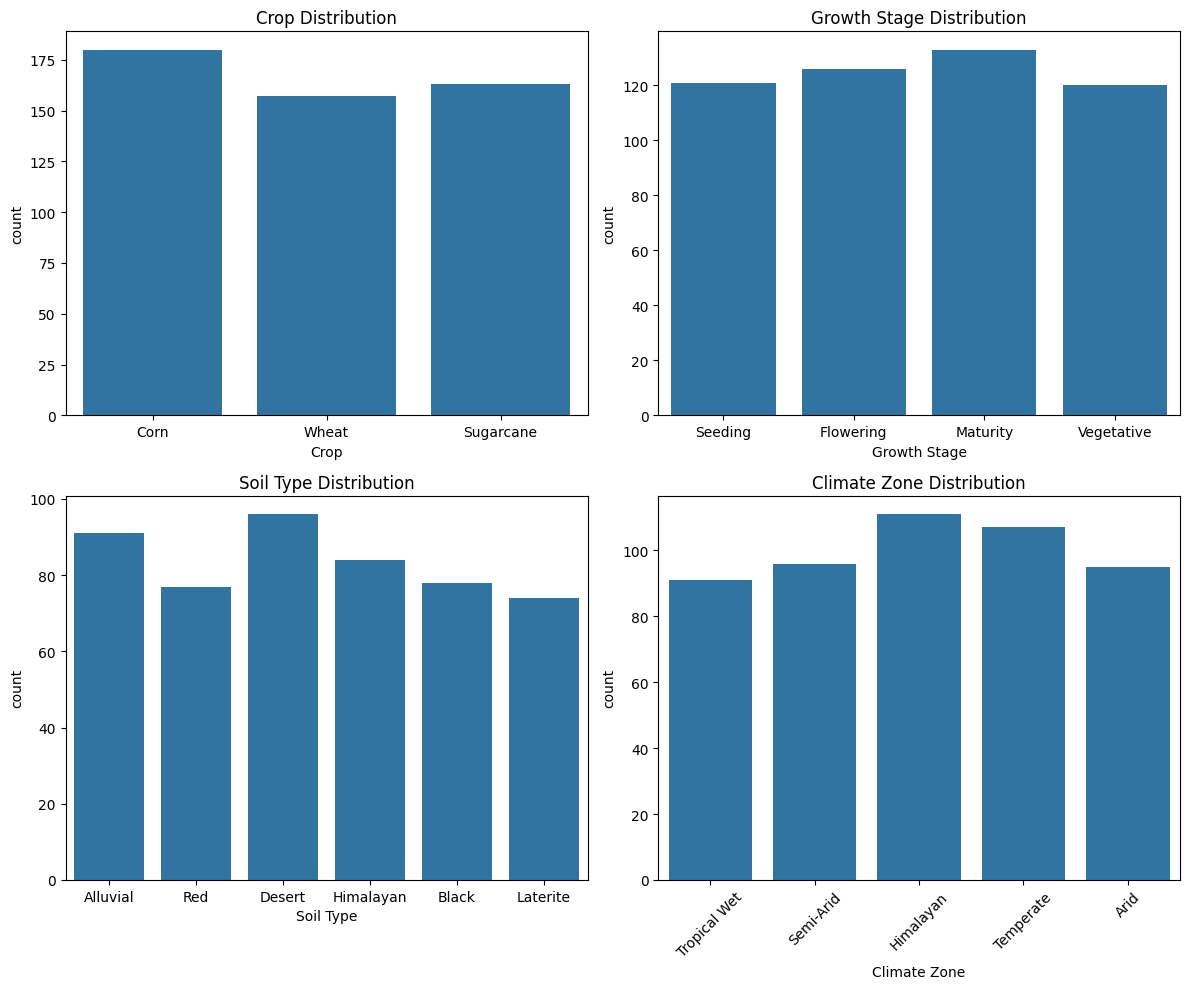

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x="Crop", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Crop Distribution")

sns.countplot(x="Growth Stage", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Growth Stage Distribution")

sns.countplot(x="Soil Type", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Soil Type Distribution")

sns.countplot(x="Climate Zone", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Climate Zone Distribution")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Apply One-Hot Encoding to categorical variables
df_encoded = pd.get_dummies(df, columns=["Crop", "Growth Stage", "Soil Type", "Climate Zone"], drop_first=True)
# Show new dataset structure
print(df_encoded.head())

   Month  Week  Temperature  Humidity  Rainfall  Wind Speed  Sunlight  \
0      4    15          2.0      27.7    2975.6        16.8       8.3   
1      4    33         25.1      62.1    2878.3        21.3       6.8   
2     12    28         12.0      31.7    3831.0        10.8       3.8   
3      5    52         -2.8      54.5     543.1        27.7       3.7   
4     12     5         -2.7      37.1    1193.1         3.3       5.1   

   Ideal Moisture (%)  Crop_Sugarcane  Crop_Wheat  ...  \
0                  50           False       False  ...   
1                  50           False        True  ...   
2                  75            True       False  ...   
3                  55           False        True  ...   
4                  85            True       False  ...   

   Growth Stage_Vegetative  Soil Type_Black  Soil Type_Desert  \
0                    False            False             False   
1                    False            False             False   
2                

In [19]:
df_encoded.head()

,Month,Week,Temperature,Humidity,Rainfall,Wind Speed,Sunlight,Ideal Moisture (%),Crop_Sugarcane,Crop_Wheat,...,Growth Stage_Vegetative,Soil Type_Black,Soil Type_Desert,Soil Type_Himalayan,Soil Type_Laterite,Soil Type_Red,Climate Zone_Himalayan,Climate Zone_Semi-Arid,Climate Zone_Temperate,Climate Zone_Tropical Wet
0,4,15,2.0,27.7,2975.6,16.8,8.3,50,False,False,...,False,False,False,False,False,False,False,False,False,True
1,4,33,25.1,62.1,2878.3,21.3,6.8,50,False,True,...,False,False,False,False,False,False,False,True,False,False
2,12,28,12.0,31.7,3831.0,10.8,3.8,75,True,False,...,False,False,False,False,False,False,False,True,False,False
3,5,52,-2.8,54.5,543.1,27.7,3.7,55,False,True,...,False,False,False,False,False,True,True,False,False,False
4,12,5,-2.7,37.1,1193.1,3.3,5.1,85,True,False,...,False,False,True,False,False,False,False,True,False,False


In [20]:
X = df_encoded.drop("Ideal Moisture (%)" , axis = 1)
y = df_encoded["Ideal Moisture (%)"]
print(X.head())
print(y.head())

   Month  Week  Temperature  Humidity  Rainfall  Wind Speed  Sunlight  \
0      4    15          2.0      27.7    2975.6        16.8       8.3   
1      4    33         25.1      62.1    2878.3        21.3       6.8   
2     12    28         12.0      31.7    3831.0        10.8       3.8   
3      5    52         -2.8      54.5     543.1        27.7       3.7   
4     12     5         -2.7      37.1    1193.1         3.3       5.1   

   Crop_Sugarcane  Crop_Wheat  Growth Stage_Maturity  ...  \
0           False       False                  False  ...   
1           False        True                  False  ...   
2            True       False                  False  ...   
3           False        True                  False  ...   
4            True       False                  False  ...   

   Growth Stage_Vegetative  Soil Type_Black  Soil Type_Desert  \
0                    False            False             False   
1                    False            False             False   

In [21]:
from sklearn.model_selection import train_test_split
# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (400, 21)
Testing Data: (100, 21)


In [22]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")



Mean Absolute Error: 3.1825
Root Mean Squared Error: 3.856562588627339
R² Score: 0.8967344777906997


In [24]:
# Example new data
new_data = pd.DataFrame({
    "Crop": ["Wheat"],
    "Growth Stage": ["Flowering"],
    "Soil Type": ["Alluvial"],
    "Climate Zone": ["Semi-Arid"],
    "Month": [4],
    "Week": [15],
    "Temperature": [25.5],
    "Humidity": [60],
    "Rainfall": [100],
    "Wind Speed": [10],
    "Sunlight": [8]
})

# Apply same encoding as training data
new_data = pd.get_dummies(new_data, columns=["Crop", "Growth Stage", "Soil Type", "Climate Zone"], drop_first=True)
new_data = new_data.reindex(columns=X.columns, fill_value=0)  # Align columns

# Predict ideal moisture
predicted_moisture = model.predict(new_data)
print(f"Predicted Ideal Moisture: {predicted_moisture[0]}%")


Predicted Ideal Moisture: 61.65%


In [25]:
# Predict ideal moisture
predicted_moisture = model.predict(new_data)[0]
print(f"Predicted Ideal Moisture: {predicted_moisture:.2f}%")

# Classify moisture level
if predicted_moisture < 30:
    moisture_status = "Bad (Too Dry)"
elif 30 <= predicted_moisture <= 50:
    moisture_status = "Average (Acceptable)"
else:
    moisture_status = "Good (Optimal)"

print(f"Moisture Condition: {moisture_status}")


Predicted Ideal Moisture: 61.65%
Moisture Condition: Good (Optimal)
